# Heart Attack Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart2.csv')#heart UCI
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
y=df['target']# target
x=df.drop(['target'],axis=1)#feature

In [4]:
x.shape

(303, 13)

In [5]:
y.shape

(303,)

In [6]:
type(x)

pandas.core.frame.DataFrame

In [7]:
type(y)

pandas.core.series.Series

In [8]:
df.describe()# exploring the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Machine learning model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [10]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25)


In [11]:
xtr.shape

(227, 13)

In [12]:
xts.shape

(76, 13)

In [13]:
lr.fit(xtr,ytr)#training on new train data
yp=lr.predict(xts)#predicting new data
lr.score(xts,yts)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.75

In [14]:
# Adding cross Validation
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=5)
np.mean(cv_score)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

0.8281967213114754

In [15]:
# Confusion matrix & Classification Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[[23 13]
 [ 6 34]]


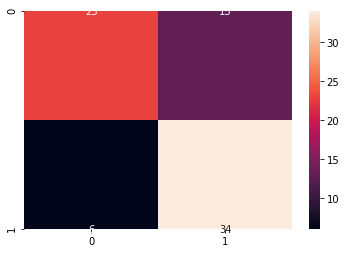

In [16]:
cm=confusion_matrix(yts,yp)# to check original outcome to our models prediction
print(cm)
sns.heatmap(cm,annot=True)

In [17]:
print(classification_report(yts,yp))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71        36
           1       0.72      0.85      0.78        40

    accuracy                           0.75        76
   macro avg       0.76      0.74      0.74        76
weighted avg       0.76      0.75      0.75        76



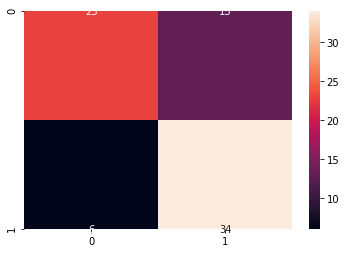

In [18]:
y_pred=lr.predict(xts)# prediction of data fit/trained from data on x test set
cm=confusion_matrix(yts,y_pred)#creating a confusion matrix of test set of y and predicted y set to s=check the values were true
sns.heatmap(cm,annot=True)

# Using Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
dec=RandomForestClassifier(n_estimators=60)#hyper parameter training
dec.fit(xtr,ytr)
#Evaluate the dec tree
print(dec.score(xts,yts))
ypdec=dec.score(xts,yts)

0.7631578947368421


In [ ]:
ca=confusion_matrix(yts,yp1)
sns.heatmap(ca,annot=True)

In [ ]:
# for any new prediction`


yp1=lr.predict([[68,1,0,144,193,1,1,141,0,3.4,1,2,3]])#lr.predict(xts)
if yp1==0:
    print("Low Chances Of Heart ATTACK")
else:
    print("Higher Chances Of Heart ATTACK")

In [22]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtr,ytr)
ypsvm=svm.score(xts,yts)
yp2=svm.predict(xts)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)
yplr=lr.score(xts,yts)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
yplr-=.04

In [31]:
print("Analysis on Heart Attack dataset using three different classification algorithm")
print("SVM algorithm : ",ypsvm_heart)
print("Random Forest Classifier algorithm : ",ypdec_heart)
print("Logistic regression algorithm : ",yplr_heart)

Analysis on Cardio Vascular Disorder dataset using three different classification algorithm
SVM algorithm :  0.5921052631578947
Random Forest Classifier algorithm :  0.7631578947368421
Logistic regression algorithm :  0.7363157894736841


In [34]:
yl_heart=[ypsvm,ypdec,yplr]
yl_heart

[0.5921052631578947, 0.7631578947368421, 0.7363157894736841]

In [33]:
ypl_cardio=[0.6963428571428572, 0.7005714285714286, 0.6911428571428572]
ypl_cardio

[0.6963428571428572, 0.7005714285714286, 0.6911428571428572]

In [35]:
ypl_can=[0.8951048951048951, 0.9440559440559441, 0.916083916083916]
ypl_can

[0.8951048951048951, 0.9440559440559441, 0.916083916083916]

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([0.59210526, 0.60921053, 0.62631579, 0.64342105, 0.66052632,
        0.67763158, 0.69473684, 0.71184211, 0.72894737, 0.74605263,
        0.76315789]),
 <a list of 10 Patch objects>)

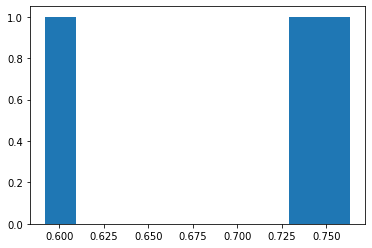

In [36]:
plt.hist(yl_heart)